<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [71]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [72]:
import pandas as pd
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 

#### Read the dataset in the csv file from the URL


In [73]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [112]:
 # Variables in order:
 # CRIM     per capita crime rate by town
 # ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 # INDUS    proportion of non-retail business acres per town
 # CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 # NOX      nitric oxides concentration (parts per 10 million)
 # RM       average number of rooms per dwelling
 # AGE      proportion of owner-occupied units built prior to 1940
 # DIS      weighted distances to five Boston employment centres
 # RAD      index of accessibility to radial highways
 # TAX      full-value property-tax rate per $10,000
 # PTRATIO  pupil-teacher ratio by town
 # B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 # LSTAT    % lower status of the population
 # MEDV     Median value of owner-occupied homes in $1000's

In [75]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [52]:
# TASK 2

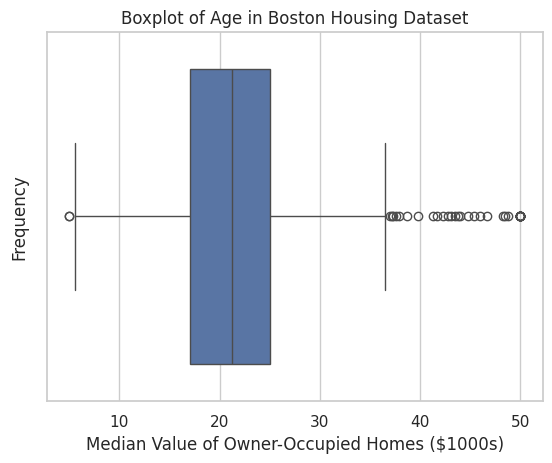

In [25]:
# Q1: For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(x='MEDV', data=boston_df)
ax.set_title('Boxplot of Age in Boston Housing Dataset')  
ax.set_xlabel('Median Value of Owner-Occupied Homes ($1000s)')  
ax.set_ylabel('Frequency')  
plt.show()

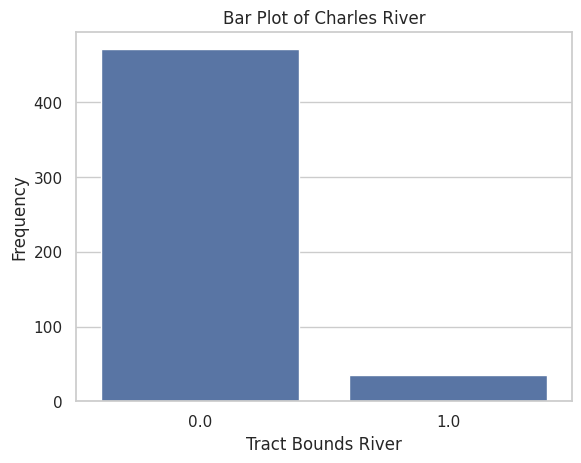

In [31]:
# Q2: Provide a  bar plot for the Charles river variable
sns.set(style="whitegrid")
ax = sns.countplot(x="CHAS", data=boston_df)
plt.title('Bar Plot of Charles River')  
plt.xlabel('Tract Bounds River')  
plt.ylabel('Frequency')  
  
plt.show()

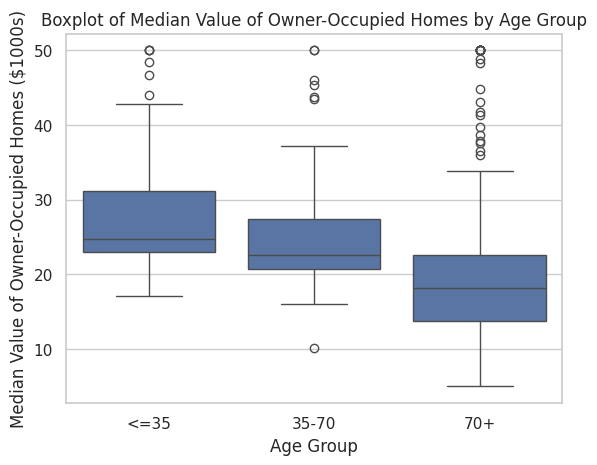

In [36]:
# Q3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '70+'])  
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)  
plt.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')  
plt.xlabel('Age Group')  
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()  

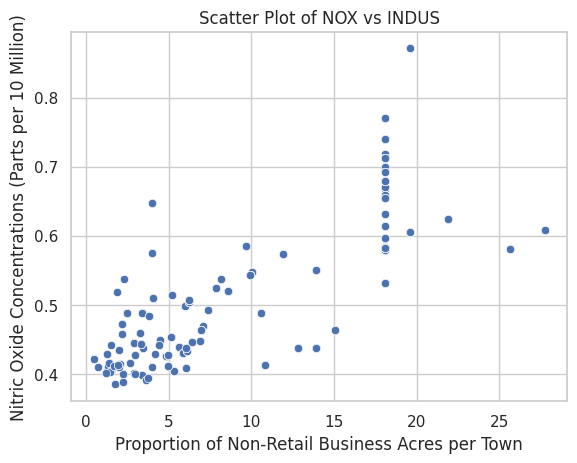

In [38]:
# Q4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')  
plt.xlabel('Proportion of Non-Retail Business Acres per Town')  
plt.ylabel('Nitric Oxide Concentrations (Parts per 10 Million)') 
plt.show()
# Analysis - Nitric oxide concentrations and the proportion of non-retail business acres per town seem to have positive relationship. As the proportion of non-retail business acres per town increases, the nitric oxide concentrations also tend to increase. 

Text(0, 0.5, 'Frequency')

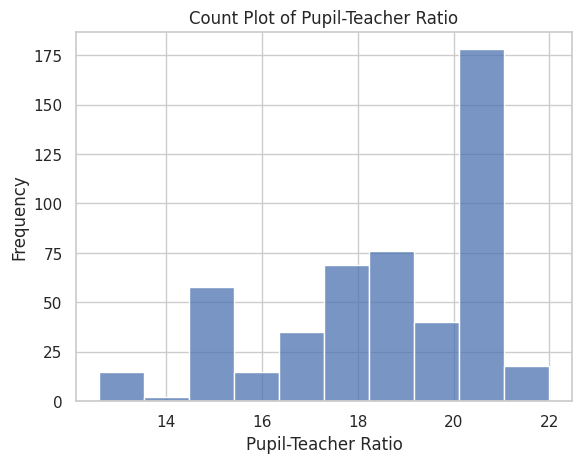

In [51]:
# Q5 Create a histogram for the pupil to teacher ratio variable
sns.histplot(x='PTRATIO', data=boston_df, bins=10) 
plt.title('Count Plot of Pupil-Teacher Ratio')  
plt.xlabel('Pupil-Teacher Ratio')  
plt.ylabel('Frequency')  

In [ ]:
# TASK 3

In [60]:
# Q6 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)
# Conclusion: Since the p-value is greater than alpha value 0.05, we accept the null hypothesis and reject the altnerative hypothesis as there is not enough proof that there is a statistical difference in median value of houses bounded by the Charles river

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [78]:
# Q7 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '70+'])  
thirtyfive_lower_eval = boston_df[boston_df['AGE_group'] == '<=35']['MEDV']
thirtyfive_seventy_eval = boston_df[boston_df['AGE_group'] == '35-70']['MEDV']
seventy_older_eval = boston_df[boston_df['AGE_group'] == '70+']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_eval, thirtyfive_seventy_eval, seventy_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
# Conclusion: Since the p-value is less than 0.05, we wil reject the null hypothesis as there is significant evidence that at least one of the medians differ from each other.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [69]:
# Q8 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there does exist a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [111]:
# Q9 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
df = boston_df[['MEDV', 'DIS', 'RM', 'LSTAT', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]  
  
model = sm.OLS(df['MEDV'], sm.add_constant(df.drop('MEDV', axis=1))).fit()  
  
print(model.summary())  
# Conclusion: For each additional weighted distance to the five boston employment centres, the median value of owner occupied homes decreases by 1.4908 (or $1490.80)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          2.23e-133
Time:                        17:42:08   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0